In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def lines(slope=0.5, offset=0.2, start=0,stop=10,step=0.1):
    X = np.array([[x,x*slope-offset] for x in np.arange(start,stop,step)] + [[x,x*slope+offset] for x in np.arange(start,stop,step)])
    y = np.array([1 for i in np.arange(start,stop,step)] + [0 for i in np.arange(start,stop,step)])
    return X,y


# Pandas is used for data manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score

def train_report(clf,X,y):
    clf.fit(X, y)
    print("accuracy:",clf.score(X,y)) # classification accuracy

    # Plot the decision boundary
    #plot_decision_boundary(lambda x: clf.predict(x),X,y)
    #plt.show()


In [2]:
def plot_decision_boundary(pred_func, X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [3]:
# Read in data and display first 5 rows
features = pd.read_csv('ds2.csv')
features.head(5)


X = features.drop('calving difficulty', axis=1)
y = features['calving difficulty']


In [4]:

# list for column headers
print(features.shape)
# print head of data set
print(features.head())


(90, 7)
   race  lactation  twins  sex  THI mean  THI variance  calving difficulty
0     0          2      0    0   63.3241       17.6722                   0
1     0          4      0    0   66.8641       17.2446                   0
2     1          0      0    0   63.3241       17.6722                   0
3     0          5      0    0   65.5977       36.0564                   3
4     0          2      0    1   65.1415       26.8230                   0


# PCA
for plotting purpose, PCA is set to 2 for now
We can check with different components to get more accurate model

In [5]:
pca = PCA(n_components=3)
NX = pca.fit_transform(X)


# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(NX, y, test_size=0.3, random_state=42)



# Random Forest

In [6]:



# random forest model creation
rfc = RandomForestClassifier()
#from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear')
train_report(rfc, X_train, y_train)
    # predictions



accuracy: 0.9365079365079365


c:\users\ali\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12  1  0  0]
 [ 4  4  0  0]
 [ 4  1  0  0]
 [ 1  0  0  0]]
              precision    recall  f1-score   support

           0       0.57      0.92      0.71        13
           1       0.67      0.50      0.57         8
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.59        27
   macro avg       0.31      0.36      0.32        27
weighted avg       0.47      0.59      0.51        27



c:\users\ali\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM

In [8]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
train_report(svclassifier, X_train, y_train)

accuracy: 0.9365079365079365


c:\users\ali\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0  0  0]
 [ 6  2  0  0]
 [ 5  0  0  0]
 [ 1  0  0  0]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        13
           1       1.00      0.25      0.40         8
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.56        27
   macro avg       0.38      0.31      0.27        27
weighted avg       0.55      0.56      0.45        27



c:\users\ali\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
svclassifier = SVC(kernel='linear')
train_report(svclassifier, X_train, y_train)
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy: 0.5714285714285714
[[11  2  0  0]
 [ 4  4  0  0]
 [ 5  0  0  0]
 [ 0  1  0  0]]
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.57      0.50      0.53         8
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.56        27
   macro avg       0.28      0.34      0.30        27
weighted avg       0.43      0.56      0.48        27



c:\users\ali\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
train_report(clf, X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy: 1.0
[[10  1  1  0  1]
 [ 6  1  1  0  0]
 [ 2  2  0  1  0]
 [ 1  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.53      0.77      0.62        13
           1       0.25      0.12      0.17         8
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

    accuracy                           0.41        27
   macro avg       0.16      0.18      0.16        27
weighted avg       0.33      0.41      0.35        27



c:\users\ali\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


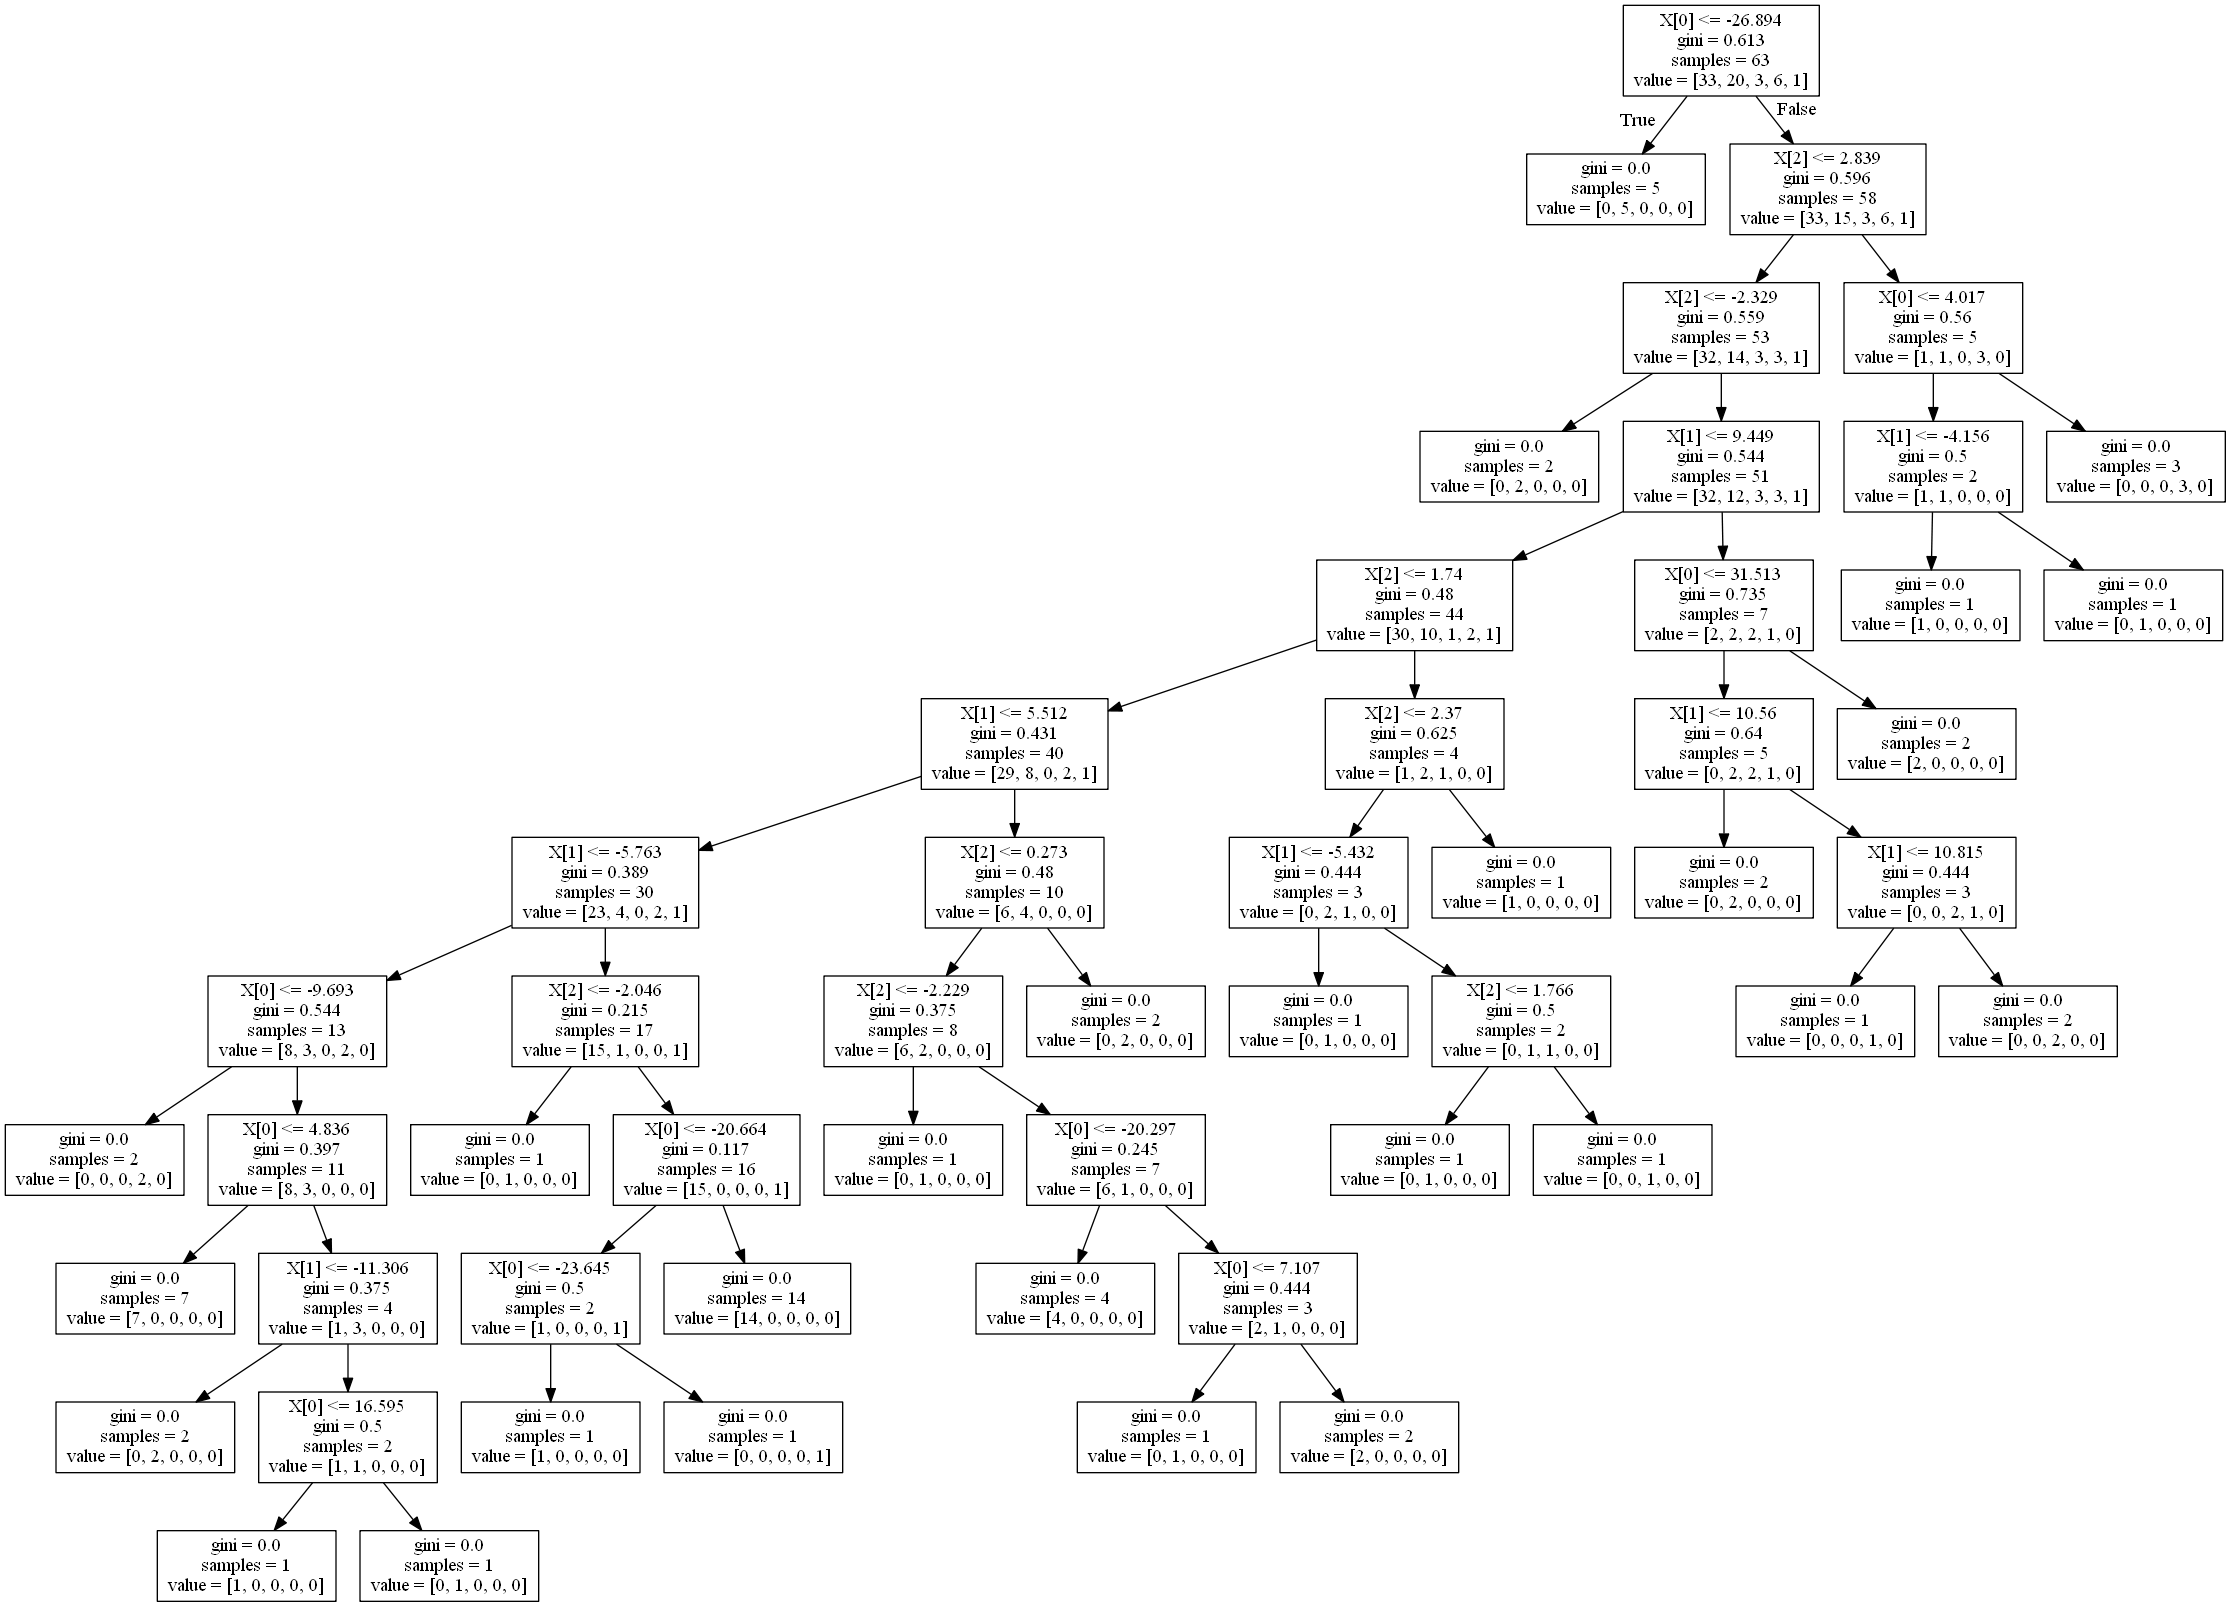

In [12]:
from IPython.display import Image

tree.export_graphviz(clf,out_file='dt.dot')

!dot -Tpng dt.dot -o dt.png
Image("dt.png")

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

train_report(clf, X_train, y_train)

accuracy: 0.6190476190476191


c:\users\ali\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ali\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  1  0  1]
 [ 3  4  0  1]
 [ 5  0  0  0]
 [ 0  1  0  0]]
              precision    recall  f1-score   support

           0       0.58      0.85      0.69        13
           1       0.67      0.50      0.57         8
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.56        27
   macro avg       0.31      0.34      0.31        27
weighted avg       0.48      0.56      0.50        27



c:\users\ali\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
